# Рекомендательная система под бизнес-задачу (ритейл)

#### Давайте сначала разберемся что такое рекомендательная система и как можно реализовать её под ритейл.
##### Человек приходит в оффлайн и онлайн-магазины, как правило, за определенным товаром. Как подтолкнуть его к новым покупкам? Самый простой путь ─ предложить ему дополнительные товары, но если советовать все подряд, есть риск потерять посетителя из-за навязчивости. Однако, если не предложить ничего, то меньше шансы продать покупателю дополнительные товары или привлечь его в магазин снова.
##### Найти «золотую середину» помогают рекомендательные системы. Рекомендательные системы ─ это специальные алгоритмы, которые предлагают пользователю товары, подходящие ему по тем или иным критериям.
##### Примеры рекомендаций в интернет-магазинах:
##### 1. На основе фильтрации: “Похожие товары”
##### 2. Экспертные рекомендации
##### 3. Рекомендации на основе анализа данных

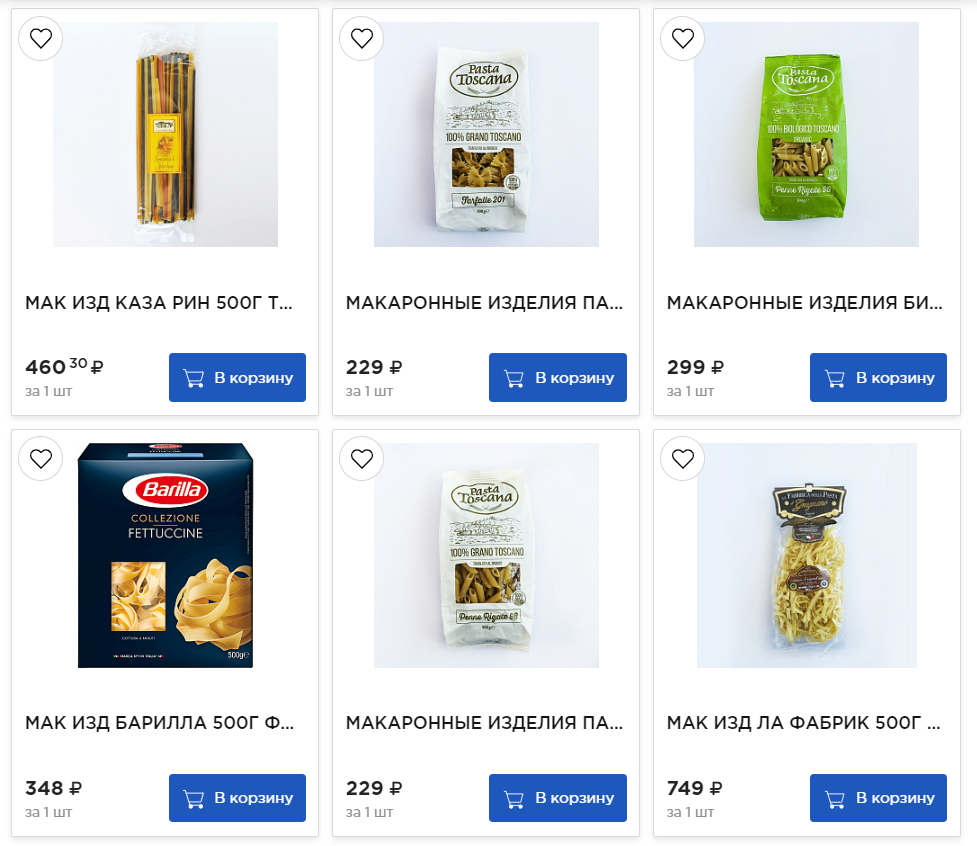

#### Рекомендательные системы: польза для покупателя и продавца
##### Выгоды продавца очевидны, в первую очередь это:
##### 1. Увеличение лояльности покупателей через подходящие, а не назойливые рекомендации;
##### 2. Повышение выручки за счет повторных покупок и продаж сопутствующих товаров;
##### 3. Понимание целевой аудитории, что помогает более точно использовать маркетинговые инструменты.
Но и покупатель тоже выигрывает от использования рекомендаций. Самостоятельный выбор требует много времени: нужно подобрать подходящие варианты, сравнить их между собой и найти самый лучший.

Разработка подобных решений требует определенных инвестиций, однако, в конечном итоге они окупаются за счет роста прибыли.

## Продуктовые рекомендации
#### Реализация для сайта продуктового магазина

Импорт зависимостей

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Чтение данных

In [ ]:
aisles = pd.read_csv("aisles.csv")
departments = pd.read_csv("departments.csv")
order_train = pd.read_csv("order_products__train.csv")
orders = pd.read_csv("orders.csv")
products = pd.read_csv("products.csv")

In [ ]:
order = order_train.merge(orders, on=['order_id'], how = 'inner')
order = order.merge(products, on=['product_id'], how = 'inner')
order = order.merge(aisles, on=['aisle_id'], how = 'inner')
order_df = order.merge(departments, on=['department_id'], how = 'inner')
order_df.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
0,1,49302,1,1,112108,train,4,4,10,9.0,Bulgarian Yogurt,120,16,yogurt,dairy eggs
1,816049,49302,7,1,47901,train,14,4,6,16.0,Bulgarian Yogurt,120,16,yogurt,dairy eggs
2,1242203,49302,1,1,2993,train,15,0,7,7.0,Bulgarian Yogurt,120,16,yogurt,dairy eggs
3,1383349,49302,11,1,41425,train,4,3,8,14.0,Bulgarian Yogurt,120,16,yogurt,dairy eggs
4,1787378,49302,8,0,187205,train,5,4,14,30.0,Bulgarian Yogurt,120,16,yogurt,dairy eggs


In [ ]:
hello = order_df[order_df['product_name']=='Banana']
hello[hello['reordered']==1][15:]

,order_id,product_id,add_to_cart_order,reordered,user_id,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
406749,3957,24852,8,1,159235,15,8.0,Banana,24,4,fresh fruits,produce
406750,4164,24852,13,1,53847,10,30.0,Banana,24,4,fresh fruits,produce
406751,4284,24852,3,1,163282,13,16.0,Banana,24,4,fresh fruits,produce
406752,4340,24852,1,1,155989,13,30.0,Banana,24,4,fresh fruits,produce
406753,4431,24852,1,1,85243,11,20.0,Banana,24,4,fresh fruits,produce
...,...,...,...,...,...,...,...,...,...,...,...,...
425451,3419435,24852,4,1,38708,9,22.0,Banana,24,4,fresh fruits,produce
425452,3419531,24852,2,1,43300,15,6.0,Banana,24,4,fresh fruits,produce
425454,3419629,24852,5,1,170950,9,7.0,Banana,24,4,fresh fruits,produce
425455,3420088,24852,9,1,72444,8,5.0,Banana,24,4,fresh fruits,produce


In [ ]:
order_df[order_df['user_id']==163282]

,order_id,product_id,add_to_cart_order,reordered,user_id,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
13682,4284,20842,13,1,163282,13,16.0,Total 0% Greek Yogurt,120,16,yogurt,dairy eggs
133624,4284,35921,7,1,163282,13,16.0,Organic Large Grade A Brown Eggs,86,16,eggs,dairy eggs
187789,4284,27845,8,1,163282,13,16.0,Organic Whole Milk,84,16,milk,dairy eggs
241300,4284,45007,4,1,163282,13,16.0,Organic Zucchini,83,4,fresh vegetables,produce
316835,4284,19678,1,1,163282,13,16.0,Organic Russet Potato,83,4,fresh vegetables,produce
318009,4284,47042,10,1,163282,13,16.0,Organic Red On the Vine Tomato,83,4,fresh vegetables,produce
393956,4284,21137,12,1,163282,13,16.0,Organic Strawberries,24,4,fresh fruits,produce
406751,4284,24852,3,1,163282,13,16.0,Banana,24,4,fresh fruits,produce
735930,4284,18811,5,1,163282,13,16.0,Organic Apple Juice,98,7,juice nectars,beverages
810868,4284,13646,11,1,163282,13,16.0,Lemon Hummus,67,20,fresh dips tapenades,deli


In [ ]:
Создание поддельного адреса электронной почты для идентификатора пользователя

In [ ]:
order_test = order_df.drop(['eval_set','order_number','order_dow','order_hour_of_day','days_since_prior_order'], axis=1)
user = orders['user_id'].unique()
user_df = pd.DataFrame(user, columns = ['user_id'])
user_df['email'] = [f'user_{user}@gmail.com' for user in user_df['user_id']]
user_df.head()

,user_id,email
0,1,user_1@gmail.com
1,2,user_2@gmail.com
2,3,user_3@gmail.com
3,4,user_4@gmail.com
4,5,user_5@gmail.com


In [ ]:
Удаление столбцов, которые не нужны

In [ ]:
order_df = order_df.drop(columns = ['eval_set', 'order_number','order_dow'], axis =1)
order_df.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
0,1,49302,1,1,112108,10,9.0,Bulgarian Yogurt,120,16,yogurt,dairy eggs
1,816049,49302,7,1,47901,6,16.0,Bulgarian Yogurt,120,16,yogurt,dairy eggs
2,1242203,49302,1,1,2993,7,7.0,Bulgarian Yogurt,120,16,yogurt,dairy eggs
3,1383349,49302,11,1,41425,8,14.0,Bulgarian Yogurt,120,16,yogurt,dairy eggs
4,1787378,49302,8,0,187205,14,30.0,Bulgarian Yogurt,120,16,yogurt,dairy eggs


In [ ]:
order_df.to_csv("order_df.csv", index=False)

In [ ]:
Проверка, есть ли постоянные клиенты
Группа по пользователю, идентификатору продукта и названию продукта

In [ ]:
top_user = order_df.groupby(['user_id','product_id','product_name']).size().reset_index(name = "count")
top_user = pd.DataFrame(top_user)
len(pd.unique(top_user['count']))

1

#### Уникальные значения в Count равны 1, что означает, что этот набор данных относится к уникальным клиентам.

In [ ]:
print( len(pd.unique(order_df['aisle'])), len(pd.unique(order_df['department'])), len(pd.unique(order_df['product_id'])))

134 21 39123


In [ ]:
Чтобы иметь кластер, который работает быстро без достаточного количества функций, мы сосредоточимся на проходах

## Лучшие продукты за проход

In [ ]:
top_aisle = order_df.groupby(['aisle_id','aisle','product_id','product_name']).size().reset_index(name = "count")
top_aisle = pd.DataFrame(top_aisle)
top_aisle.head()

,aisle_id,aisle,product_id,product_name,count
0,1,prepared soups salads,209,Italian Pasta Salad,8
1,1,prepared soups salads,554,Turkey Chili,56
2,1,prepared soups salads,886,Whole Grain Salad with Roasted Pecans & Mango ...,1
3,1,prepared soups salads,1600,Mediterranean Orzo Salad,5
4,1,prepared soups salads,2539,Original Potato Salad,33


## ТОП-3

In [ ]:
# Сортировка по убыванию
top_aisle = top_aisle.sort_values(by='count', ascending = False)
# Сортировка по возрастанию на проходе
top_aisle = top_aisle.sort_values(by='aisle_id')
# Получить уникальный список aisle_id
unique_aisle = pd.unique(top_aisle['aisle_id'])
# Получить начальный фрейм данных для concat
inital_df = top_aisle.loc[top_aisle['aisle_id'] == unique_aisle[0]].nlargest(3, columns='count')
# Цикл for, чтобы объединить 3 лучших продукта каждого прохода
for i in range(1,len(unique_aisle)):
    top_3 = top_aisle.loc[top_aisle['aisle_id'] == unique_aisle[i]].nlargest(3, columns='count')
    inital_df = pd.concat([inital_df,top_3])
top3_aisle = inital_df
top3_aisle.head()

,aisle_id,aisle,product_id,product_name,count
61,1,prepared soups salads,26047,Tuna Salad,208
57,1,prepared soups salads,25199,Classic Chicken Salad,200
50,1,prepared soups salads,22281,Chicken Noodle Soup,165
293,2,specialty cheeses,37524,Fresh Mozzarella Ball,450
194,2,specialty cheeses,13409,Dubliner Wedge Pre Cut Cheese,253


Список повторных покупок

In [ ]:
reorder = order_df[order_df['reordered']==1]
reorder_df = reorder[['product_id', 'user_id', 'product_name', 'aisle_id', 'department_id', 'aisle', 'department']]
reorder_df.head()

,product_id,user_id,product_name,aisle_id,department_id,aisle,department
0,49302,112108,Bulgarian Yogurt,120,16,yogurt,dairy eggs
1,49302,47901,Bulgarian Yogurt,120,16,yogurt,dairy eggs
2,49302,2993,Bulgarian Yogurt,120,16,yogurt,dairy eggs
3,49302,41425,Bulgarian Yogurt,120,16,yogurt,dairy eggs
5,49302,199120,Bulgarian Yogurt,120,16,yogurt,dairy eggs


## Модель (K-Means)

In [ ]:
Преобразование таблицы в процент покупок в проходе для пользователя, рассчёт процент пользователей
И объединение этих двух наборов данных подсчета и суммирования для рассчёта процента прохода

In [ ]:
percent_user = order_df.groupby(['user_id','aisle_id','aisle']).size().reset_index(name='count')
sum_userproduct = percent_user.groupby(['user_id'])['count'].sum().reset_index(name='sum')
percent_user = percent_user.merge(sum_userproduct, on='user_id')
percent_user['percent'] = percent_user['count']/percent_user['sum']
percent_user.head()

,user_id,aisle_id,aisle,count,sum,percent
0,1,21,packaged cheese,1,11,0.090909
1,1,23,popcorn jerky,1,11,0.090909
2,1,45,candy chocolate,1,11,0.090909
3,1,53,cream,1,11,0.090909
4,1,54,paper goods,1,11,0.090909


In [ ]:
Создание таблицы процентов прохода продукта пользователя

In [ ]:
percent_df = pd.pivot_table(percent_user, values='percent', index='user_id', columns = 'aisle', fill_value = 0 )
percent_df = percent_df.sort_index()
percent_df.head()

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.090909
2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
5,0.111111,0.222222,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
7,0.000000,0.000000,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
8,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.055556,0.055556,0.0,0.0,0.0,0.0,0.0,0.000000


In [ ]:
# Модель K-means
from sklearn.cluster import KMeans
distortions = []
for k in range(1,15):
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(percent_df)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(1,15), distortions)
plt.xlabel('k')
plt.ylabel('Distortion')
plt.show()

KeyboardInterrupt: 

In [ ]:
Примерно 6, поэтому мы будем использовать 6 для количества кластеров

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 6).fit(percent_df)
cluster_label = kmeans.labels_
percent_ct = pd.pivot_table(percent_user, values='count', index='user_id', columns = 'aisle', fill_value = 0 )
# Добавление метки кластера в фреймворк данных, чтобы идентифицировать клиентский сегмент
percent_ct['cluster'] = cluster_label
# Просмотр:
percent_ct.head()

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,cluster
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,4
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
5,1,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,4
8,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,3


In [ ]:
user_percent = percent_ct.reset_index(drop=True)
user_percent

aisle,user_id,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,...,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,cluster
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,4
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,5,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,7,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,4
4,8,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131204,206199,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,4
131205,206200,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,2,0,0,3
131206,206203,0,0,0,0,0,0,0,0,0,...,3,0,0,0,0,0,0,0,0,4
131207,206205,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,2


In [ ]:
Суммарное количество купленных товаров в проходе

In [ ]:
cluster_summary = percent_ct.groupby('cluster').sum()
cluster_summary = cluster_summary.reset_index(drop=False)
cluster_summary.head()

aisle,cluster,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
0,0,6,33,0,1,15,11,61,10,3,...,82,177,10,12,34,32,24,7338,11,154
1,1,44,440,30,19,979,136,890,57,18,...,1090,744,364,634,137,82,192,3162,32,4505
2,2,31,262,16,20,936,77,563,27,14,...,772,611,232,372,91,56,119,2045,29,22749
3,3,101,2132,42,49,1652,190,2798,162,32,...,2046,1350,1665,2066,99,143,339,5208,96,8903
4,4,885,4134,218,239,9616,1056,8718,829,220,...,8009,6482,2850,5251,1063,1287,1291,18500,918,18835


In [ ]:
Развернуть таблицу

In [ ]:
df_unpivoted = cluster_summary.melt(id_vars=['cluster'], var_name='aisle', value_name='count')
df_unpivoted = df_unpivoted.sort_values('count', ascending = False)
df_unpivoted.head()

,cluster,aisle,count
321,3,fresh vegetables,99257
304,4,fresh fruits,49428
301,1,fresh fruits,48754
303,3,fresh fruits,40940
592,4,packaged vegetables fruits,36542


In [ ]:
# Вычислить сумму прохода кластера/общую сумму
cluster_ttl = pd.DataFrame(cluster_summary.sum(axis=1), columns=['total'])
percent_cluster=[]
for i in range(6):
    filter_df = df_unpivoted[df_unpivoted['cluster'] == i].reset_index(drop=True)
    filter_df['percent'] = filter_df['count']/cluster_ttl['total'][i]
    percent_cluster.append(filter_df)
percent_cluster = pd.concat(percent_cluster)
percent_cluster.head()

,cluster,aisle,count,percent
0,0,water seltzer sparkling water,7338,0.509867
1,0,soft drinks,640,0.044469
2,0,fresh fruits,477,0.033143
3,0,milk,246,0.017093
4,0,packaged vegetables fruits,245,0.017023


## Кластеризация

In [ ]:
Необходимо определить 6 кластеров:
Кластер 0: много свежих фруктов, за которыми следуют свежие/упакованные овощи
Кластер 1: в основном свежие овощи, за которыми следуют свежие фрукты.
Кластер 2: преимущественно фасованные овощи, за которыми следуют свежие фрукты.
Кластер 3: в основном свежие фрукты, за которыми следуют свежие овощи.
Кластер 4: Сбалансированное/равнопроходное распределение
Кластер 5: в основном проходы с газированной водой и другими напитками

<ipython-input-43-3dfa07d9e9d3>:10: UserWarning: FixedFormatter should only be used together with FixedLocator

  axs[i].set_xticklabels(filter_df['aisle'].unique(), rotation = 90)

<ipython-input-43-3dfa07d9e9d3>:10: UserWarning: FixedFormatter should only be used together with FixedLocator

  axs[i].set_xticklabels(filter_df['aisle'].unique(), rotation = 90)

<ipython-input-43-3dfa07d9e9d3>:10: UserWarning: FixedFormatter should only be used together with FixedLocator

  axs[i].set_xticklabels(filter_df['aisle'].unique(), rotation = 90)

<ipython-input-43-3dfa07d9e9d3>:10: UserWarning: FixedFormatter should only be used together with FixedLocator

  axs[i].set_xticklabels(filter_df['aisle'].unique(), rotation = 90)

<ipython-input-43-3dfa07d9e9d3>:10: UserWarning: FixedFormatter should only be used together with FixedLocator

  axs[i].set_xticklabels(filter_df['aisle'].unique(), rotation = 90)

<ipython-input-43-3dfa07d9e9d3>:10: UserWarning: FixedFormatter should only be used togeth

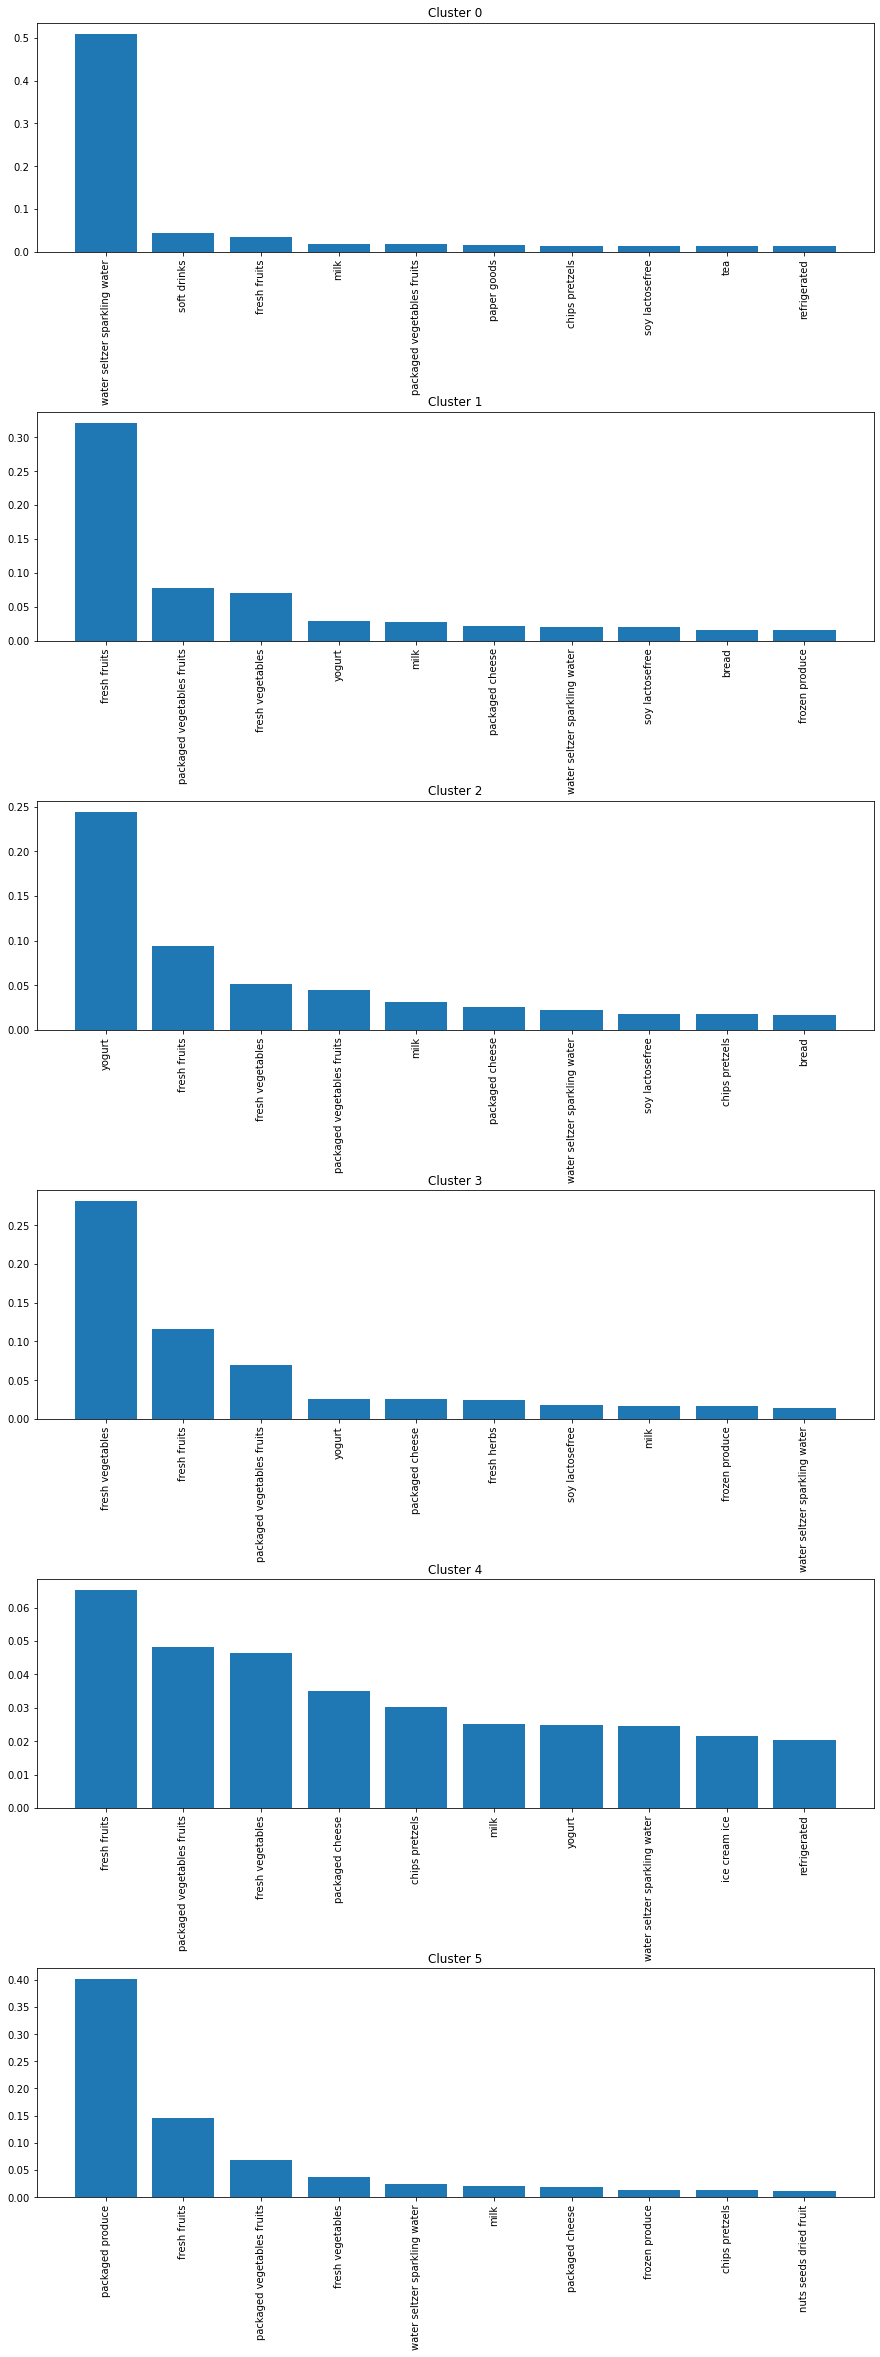

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(6, figsize = (15,40))
fig.subplots_adjust(hspace=.7)
for i in range(6):
    filter_df = percent_cluster[percent_cluster['cluster'] == i].reset_index(drop=True)
    filter_df = filter_df.iloc[0:10]
    axs[i].bar(filter_df['aisle'], filter_df['percent'])
    axs[i].title.set_text(f'Cluster {i}')
    axs[i].set_xticklabels(filter_df['aisle'].unique(), rotation = 90)

In [ ]:
Определение 10 лучших продуктов в каждом кластере, преобразование таблицы для подсчета продуктов,
подсчёт продуктов в каждом кластере и сортировка кластеров

In [ ]:
percent_ct = percent_ct.reset_index(drop=False)
top_cluster = percent_ct[['user_id','cluster']]
cluster_product = order_df[['user_id', 'product_id','product_name','aisle']].merge(top_cluster, on="user_id")
cluster_count = cluster_product.groupby(['cluster','product_name'])['product_id'].count().reset_index(name='count')
cluster_count = cluster_count.sort_values('count',ascending=False)
cluster_list = sorted(cluster_count['cluster'].unique())
inital_df = cluster_count[cluster_count['cluster'] == 0][0:10]
for i in range(1, len(cluster_list)):
    top_df = cluster_count[cluster_count['cluster'] == i][0:10]
    inital_df = pd.concat([inital_df, top_df])
cluster_top10 = inital_df
cluster_top10.head()

,cluster,product_name,count
3236,0,Sparkling Water Grapefruit,474
3269,0,Spring Water,432
1706,0,Lime Sparkling Water,339
3209,0,Sparkling Lemon Water,285
3228,0,Sparkling Water,262


In [ ]:
cluster_top10[cluster_top10['cluster']==3]

,cluster,product_name,count
33588,3,Banana,4305
43257,3,Organic Baby Spinach,3860
33491,3,Bag of Organic Bananas,3743
40783,3,Large Lemon,3289
45687,3,Organic Zucchini,3254
44003,3,Organic Garlic,3038
45661,3,Organic Yellow Onion,2926
44922,3,Organic Red Onion,2797
43751,3,Organic Cucumber,2719
45234,3,Organic Strawberries,2692


In [ ]:
from joblib import dump, load
aisle_list = sorted(order_df['aisle'].unique())
dump(kmeans, 'kmeans.joblib') 

## Рекомендации и тест

In [ ]:
def recommendations(user_email):
    email = str(user_email)
    # Преобразование электронной почты в user_id
    user_df = pd.read_csv("data/user_df.csv")
    user_id = int(user_df.loc[user_df['email'] == email, 'user_id'])
    order = pd.read_csv("data/order_df.csv")
    order = order[order['user_id'] == user_id].sort_values('add_to_cart_order')
    # Разделение повторных и единовременных заказов
    repeat = order[order['reordered'] > 0]
    nonrepeat = order[order['reordered'] == 0]
    # Прошлые заказы пользователя в формате kmean
    grocery_df = pd.read_csv("data/grocery_df.csv")
    user_order = grocery_df[grocery_df['user_id'] == user_id].drop('user_id', axis = 1)
    # Подогнать user_id к модели, вернуть кластер
    kmeans = load('data/kmeans.joblib') 
    cluster_num = kmeans.predict(user_order.to_numpy())[0]
    cluster_top10 = pd.read_csv("data/cluster_top10_img.csv")
    top10 = cluster_top10[cluster_top10['cluster'] == cluster_num]
    # Установка начальных переменных
    grocery_list = []
    n = 0
    for product in top10['product_name']:
        url_list = top10.loc[top10['product_name']==product, 'img_url']
        repeat_check = repeat[repeat['product_name'] == product]
        nonrepeat_check = nonrepeat[nonrepeat['product_name'] == product]
        if (n==3): break
        elif (not repeat_check.empty):
            grocery_list.append((product,url_list))
            n = n + 1
        elif (not nonrepeat_check.empty):
            grocery_list.append((product,url_list))
            n = n + 1
        else:
            grocery_list.append((product,url_list))
            n = n + 1 
    return grocery_list

In [ ]:
recommendations('user_5@gmail.com')

0

1

2


In [ ]:
Разделение повторных и единовременных заказов

In [ ]:
order = pd.read_csv("order_df.csv")
order = order[order['user_id'] == 8].sort_values('add_to_cart_order')
repeat = order[order['reordered'] > 0]
repeat

,order_id,product_id,add_to_cart_order,reordered,user_id,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
274130,880375,15937,1,1,8,14,10.0,Shallot,83,4,fresh vegetables,produce
340404,880375,23165,4,1,8,14,10.0,Organic Leek,83,4,fresh vegetables,produce
547074,880375,21903,14,1,8,14,10.0,Organic Baby Spinach,123,4,packaged vegetables fruits,produce
340036,880375,41540,16,1,8,14,10.0,Organic Whole White Mushrooms,83,4,fresh vegetables,produce


Создание рекомендательной функции

In [ ]:
def recommendations(user_email):
    email = str(user_email)
    # Преобразование электронной почты в user_id
    user_df = pd.read_csv("user_df.csv")
    user_id = int(user_df.loc[user_df['email'] == email, 'user_id'])
    order = pd.read_csv("order_df.csv")
    order = order[order['user_id'] == user_id].sort_values('add_to_cart_order')
    # Разделение повторных и единовременных заказов
    repeat = order[order['reordered'] > 0]
    nonrepeat = order[order['reordered'] == 0]
    # Прошлые заказы пользователя в формате kmean
    grocery_df = pd.read_csv("grocery_df.csv")
    user_order = grocery_df[grocery_df['user_id'] == user_id].drop('user_id', axis = 1)
    # Подогнать user_id к модели, вернуть кластер 
    kmeans = load('data/kmeans.joblib') 
    cluster_num = kmeans.predict(user_order.to_numpy())[0]
    cluster_top10 = pd.read_csv("cluster_top10_img.csv")
    top10 = cluster_top10[cluster_top10['cluster'] == cluster_num]
    # Установка начальных переменных
    n = 0
    grocery_list=[]
    for product in repeat['product_name']:
        top10_check = top10[top10['product_name'] == product]
        if (n == 3): break
        elif (not top10_check.empty):
            url_list = top10.loc[top10['product_name'] == product].img_url.item()
            grocery_list.append({'product': product, 'img': url_list})
            n = n + 1
    for product in nonrepeat['product_name']:
        nonrepeat_check = nonrepeat[nonrepeat['product_name'] == product]
        if (n == 3): break
        elif (not nonrepeat_check.empty):
            url_list = top10.loc[top10['product_name'] == product].img_url.item()
            grocery_list.append({'product': product, 'img': url_list})
            n = n + 1
    for product in repeat['product_name']:
        if (n == 3): break
        else:
            url_list = top10.loc[top10['product_name'] == product].img_url.item()
            grocery_list.append({'product': product, 'img': url_list})
            n = n + 1
    return grocery_list

In [ ]:
cluster_top10 = pd.read_csv("cluster_top10_img.csv")
top10 = cluster_top10[cluster_top10['cluster'] == 3]
top10.loc[top10['product_name'] == 'Banana'].img_url.item()

ValueError: can only convert an array of size 1 to a Python scalar

In [ ]:
recommendations('user_8@gmail.com')

ValueError: can only convert an array of size 1 to a Python scalar

In [ ]:
server = "grocery.cu51j1bqdgvr.us-east-2.rds.amazonaws.com"
database = "postgres"
port = "5432"
username = "postgres"
password = "postgres123"
conn = f"postgres://{username}:{password}@{server}:{port}/{database}"
import pandas as pd
final_df = pd.read_sql_table("user_df", conn)
final_df.head()

,user_id,email
0,1,user_1@gmail.com
1,2,user_2@gmail.com
2,3,user_3@gmail.com
3,4,user_4@gmail.com
4,5,user_5@gmail.com


In [ ]:
from joblib import dump, load
kmeans = load('data/kmeans.joblib')
order= pd.read_csv('data/grocery_df.csv')
order.head()

,user_id,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
0,1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.090909
1,2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
2,5,0.111111,0.222222,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
3,7,0.000000,0.000000,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
4,8,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.055556,0.055556,0.0,0.0,0.0,0.0,0.0,0.000000


In [ ]:
import images_webscraping.ipy

ModuleNotFoundError: No module named 'images_webscraping'

In [ ]:
order_df.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
0,1,49302,1,1,112108,10,9.0,Bulgarian Yogurt,120,16,yogurt,dairy eggs
1,816049,49302,7,1,47901,6,16.0,Bulgarian Yogurt,120,16,yogurt,dairy eggs
2,1242203,49302,1,1,2993,7,7.0,Bulgarian Yogurt,120,16,yogurt,dairy eggs
3,1383349,49302,11,1,41425,8,14.0,Bulgarian Yogurt,120,16,yogurt,dairy eggs
4,1787378,49302,8,0,187205,14,30.0,Bulgarian Yogurt,120,16,yogurt,dairy eggs


In [ ]:
products[products['product_name']=='All Natural Thai Dumplings']

,product_id,product_name,aisle_id,department_id
5370,5371,All Natural Thai Dumplings,13,20


#### Вывод: 
##### Мы выяснили актуальность и важность реализации рекомендательной системы под бизнес-задачу (ритейл) и реализовали её. 
##### Рекомендательные системы в ритейле помогают посетителям выбрать подходящие товары и экономят их время, а продавцы получают дополнительную выручку и лояльных покупателей.
##### В основе рекомендательных систем лежит обработка накопленной информации о посетителях, покупателях и товарах. За счёт рекомендательной системы прибыль компании быстро растёт.